# Задание 2
## 2 a)

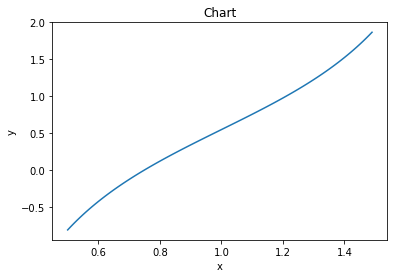

In [2]:
import matplotlib.pyplot as plt

# Оценим интегралом 1/x^2 =>
# 1/n = eps => n = 1/eps => n = 10^6
N = 10 ** 6
step = 10 ** (-2)
stepCount = 10 ** 2


def func(z):
    f = 0
    for i in range(1, N):
        f += 1 / (i ** 2 - i - z)
    return f


if __name__ == '__main__':
    k = [i * step for i in range(stepCount // 2, 3 * stepCount // 2)]
    y = []
    for x in k:
        y.append(func(x))
    plt.plot(k, y)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Chart')
    plt.show()


## 2 b)

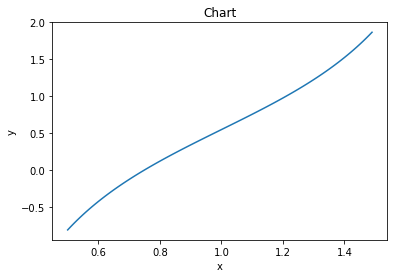

In [3]:
# Оценим интегралом 1/x^4 =>
# 1/n^3 = eps => n = 1/(eps)^(1/3) => n = 100
N = 100
step = 10 ** (-2)
stepCount = 10 ** 2


def func(z):
    f = -1 / z + 1
    for i in range(2, N):
        f += 1 / (i ** 2 - i - z) - 1 / i / (i - 1)
    return f


if __name__ == '__main__':
    k = [i * step for i in range(stepCount // 2, 3 * stepCount // 2)]
    y = []
    for x in k:
        y.append(func(x))
    plt.plot(k, y)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Chart')
    plt.savefig('chart_1b.png')

## 2 c)

Очевидно, что разность должна лежать в промежутке $[-2*eps, 2*eps]$

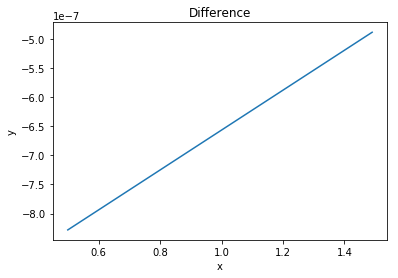

In [4]:
import matplotlib.pyplot as plt

step = 10 ** (-2)
stepCount = 10 ** 2


def func_a(z):
    N = 10 ** 6
    f = 0
    for i in range(1, N):
        f += 1 / (i ** 2 - i - z)
    return f


def func_b(z):
    N = 10 ** 2
    f = -1 / z + 1
    for i in range(2, N):
        f += 1 / (i ** 2 - i - z) - 1 / i / (i - 1)
    return f


if __name__ == '__main__':
    k = [i * step for i in range(stepCount // 2, 3 * stepCount // 2)]
    y = []
    for x in k:
        y.append(func_a(x) - func_b(x))
    plt.plot(k, y)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Difference')
    plt.savefig('chart_1c.png')


# Задание 3

In [35]:
from cmath import sqrt, log10
import matplotlib.pyplot as plt

N = 10 ** 3
M = 10 ** 5
step = 10 ** (-2)
stepCount = 10 ** 2


def func(z, MAX):
    s_1 = z
    s_2 = s_1 + z ** 2 / 3
    s_3 = s_2 + z ** 3 / 5
    f = s_3 - (s_3 - s_2) ** 2 / (s_3 - 2 * s_2 + s_1)
    for i in range(4, MAX):
        s_1 = s_2
        s_2 = s_3
        s_3 += z ** i / (2 * i - 1)
        if s_3 - 2 * s_2 + s_1 != 0:
            f = s_3 - (s_3 - s_2) ** 2 / (s_3 - 2 * s_2 + s_1)
    return f

def func_simple(z, MAX):
    s = z
    for i in range(2, MAX):
        s += z ** i / (2 * i - 1)
    return s


def plot(name, z):
    k = [i for i in range(100, N)]
    y = []
    for x in k:
        y.append(func(z, x))
    plt.plot(k, y)
    plt.xlabel('n')
    plt.ylabel('Sn')
    plt.title('Chart')
    plt.savefig(name)


def plot_complex(name, z):
    k = [i for i in range(100, N)]
    y = []
    for x in k:
        y.append(abs(func(z, x)))
    plt.plot(k, y)
    plt.xlabel('n')
    plt.ylabel('Sn')
    plt.title('Chart')
    plt.savefig(name)

# Сходимость внутри окружности слишком быстрая
# Идём по верхней дуге единичной окружности от -1 к 1
# Погрешность постепенно увеличивается


def plot_difference():
    k = [i * -step for i in range(1, stepCount)] + [i * step for i in range(1, stepCount)]
    k.sort()
    y = []
    for x in k:
        ideal = func(x + sqrt(1 - x ** 2) * 1j, M)
        y.append(log10(1 / abs(ideal - func(x + sqrt(1 - x ** 2) * 1j, N))))
    plt.plot(k, y)
    plt.xlabel('x')
    plt.ylabel('log(1 / Rn)')
    plt.title('Chart')
    plt.savefig('Difference')

In [73]:
def plot_diff_eitkin(z):
    k = [i for i in range(100, N)]
    y_eitkin = []
    x_eitkin = []
    
    y_simple = []
    x_simple = []
    ideal = func(z, M)
    for x in k:
        if abs(ideal - func(z, x)) != 0:
            y_eitkin.append(log10(abs(ideal - func(z, x))))
            x_eitkin.append(x)
        if abs(ideal - func_simple(z, x)) != 0:
            y_simple.append(log10(abs(ideal - func_simple(z, x))))
            x_simple.append(x)
    
    plt.plot(x_eitkin, y_eitkin, label='eitkin')
    plt.plot(x_simple, y_simple, label='simple')
    plt.legend()
    plt.xlabel('n')
    plt.ylabel('log(S* - Sn)')
    plt.title('Difference')
    plt.savefig('Difference')


## -0.9

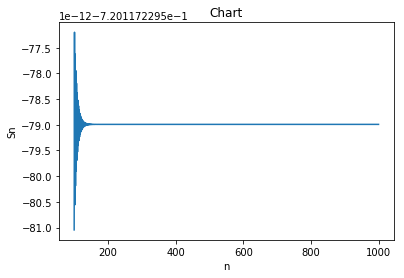

In [15]:
plot('chart_-0.9.png', -0.9)

/home/vladimir/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


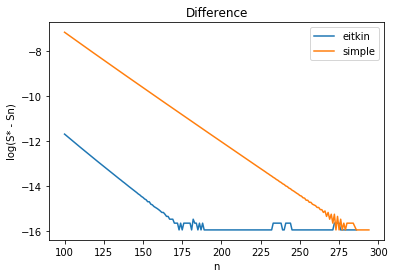

In [74]:
plot_diff_eitkin(-0.9)

## i

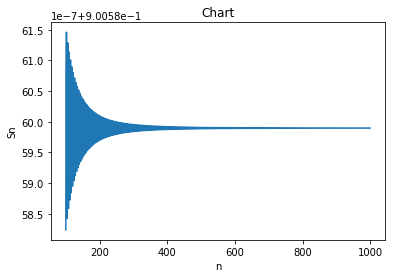

In [39]:
plot_complex('chart_i.png', 1j)

/home/vladimir/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


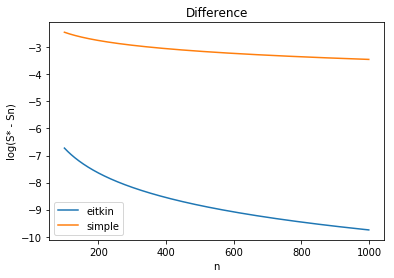

In [80]:
plot_diff_eitkin(1j)

## -1

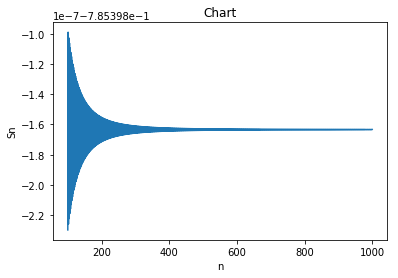

In [17]:
plot('chart_-1.png', -1)

/home/vladimir/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


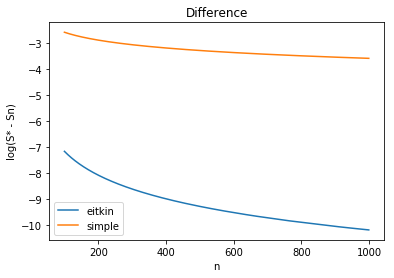

In [78]:
plot_diff_eitkin(-1)

## $e^{ 3 iPi / 4}$

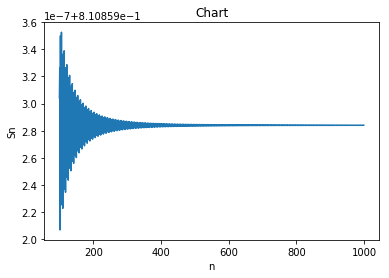

In [63]:
plot_complex('chart_exp.png', (1j - 1) / sqrt(2))

/home/vladimir/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


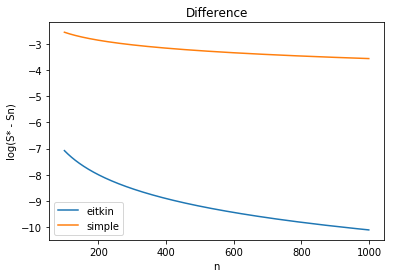

In [79]:
plot_diff_eitkin((1j - 1) / sqrt(2))

## Продолжение области сходимости

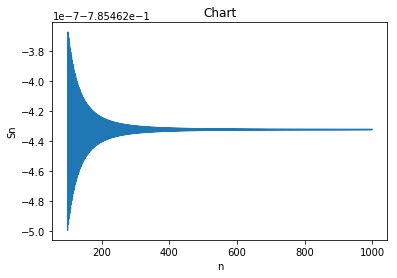

In [62]:
plot('chart_-1.0001.png', -1.0001)

/home/vladimir/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


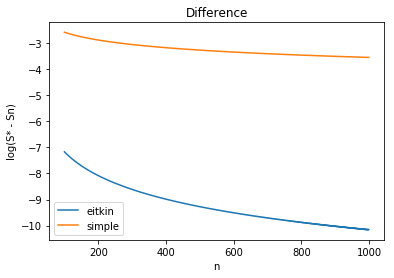

In [77]:
plot_diff_eitkin(-1.0001)

## Скорость сходимости на окружности

/home/vladimir/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


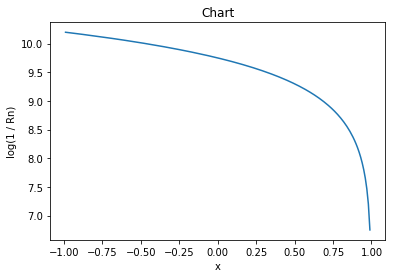

In [22]:
plot_difference()